In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import *

from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [69]:
data = pd.read_csv("Company_Data (1).csv")

In [70]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [72]:
# CONVERTING SALES TO CATEGORICAL

Sales_mean = data["Sales"].mean()

In [12]:
def Cat_Sales(sales):
    if sales < Sales_mean:
        return "low"
    else:
        return "High"

In [73]:
data["Sales_Cat"] = data["Sales"].apply(Cat_Sales)

In [74]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low


In [63]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_Cat'],
      dtype='object')

<Axes: >

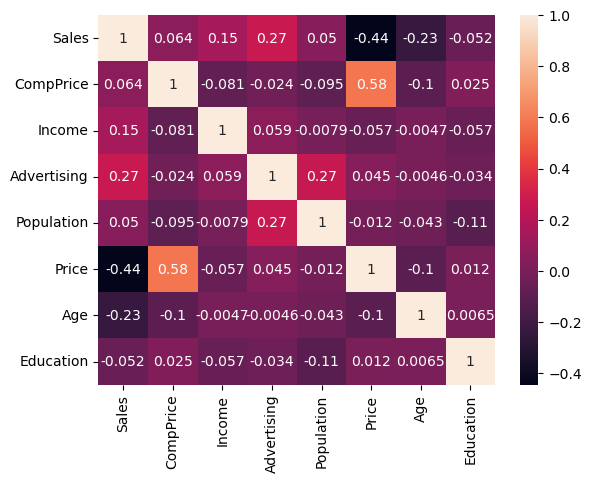

In [75]:
sns.heatmap(data=data.corr(),annot=True)

In [18]:
cat_columns = ["Urban" ,"US","ShelveLoc","Sales_Cat"]
for i in cat_columns:
    label_encoder = preprocessing.LabelEncoder()
    data[i] = label_encoder.fit_transform(data[i])

In [19]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [22]:
x = data.drop(["Sales","Sales_Cat"] , axis=1)
y = data["Sales_Cat"]

In [23]:
x_tr , x_tst , y_tr , y_tst = train_test_split(x,y,test_size=0.20,random_state=10)

In [25]:
model1 = DecisionTreeClassifier(criterion = "gini" , max_depth = 5 , min_samples_split= 5)

In [26]:
model1.fit(x_tr,y_tr)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [29]:
pred = model1.predict(x_tst)

In [30]:
print(classification_report(y_tst,pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        32
           1       0.73      0.75      0.74        48

    accuracy                           0.69        80
   macro avg       0.67      0.67      0.67        80
weighted avg       0.69      0.69      0.69        80



In [ ]:
''' THIS IS A BALANCED DATA , WE CAN PROCEED WITH THE ACCURACY  , HOWEVER THE ACCURACY JUST BY USING DECISION TREE IS VERY 
MINIMUM HENCE I HAVE IMPLEMENTED RF AND BAGGING IN THE UPCOMING FILE 
HOWEVER HERE IN ORDER TO IMPROVISE THE  ACCURACY WE ARE ALTERING THE HYPER PARAMETERS



In [49]:
model2 = DecisionTreeClassifier(criterion = "gini" , max_depth = 6 , min_samples_split= 4)
model2.fit(x_tr,y_tr)
pred = model2.predict(x_tst)
print(accuracy_score(y_tst,pred))

0.7125


In [50]:
model3 = DecisionTreeClassifier(criterion = "entropy" , max_depth = 6 , min_samples_split= 4)
model3.fit(x_tr,y_tr)
pred = model3.predict(x_tst)
print(accuracy_score(y_tst,pred))

0.675


In [53]:
model4 = DecisionTreeClassifier(criterion = "gini" , max_depth = 7 , min_samples_split= 4)
model4.fit(x_tr,y_tr)
pred = model4.predict(x_tst)
print(accuracy_score(y_tst,pred))

0.6125


In [56]:
model5 = DecisionTreeClassifier(criterion = "gini" , max_depth = 7 , min_samples_split= 3 )
model5.fit(x_tr,y_tr)
pred = model5.predict(x_tst)
print(accuracy_score(y_tst,pred))

0.6625


In [ ]:
''' THE MAX ACCURACY DECISON IS 70% WE CAN GO WITH MODEL 4 WITH MIN DEPTH AND MIN SPLIT DATA TO AVIOD OVERFITTING

In [57]:
model2.score(x_tr,y_tr)

0.909375

In [58]:
model2.score(x_tst,y_tst)

0.7125

In [ ]:
''' CHECKING FOR OVERFITTING 

In [59]:
model1.score(x_tr,y_tr)

0.909375

In [60]:
model1.score(x_tst,y_tst)

0.7

In [ ]:
''' THIS IS IDEALLY  A CASE OF OVERFITTING WITH max_depth = 6 , min_samples_split= 4 , HENCE I HAVE IMPLEMENTED RF AND BAGGING .

In [61]:
''' PLOTTING A TREE '''

model1.feature_importances_

array([0.12316767, 0.09066285, 0.11768823, 0.03247032, 0.37367977,
       0.1697913 , 0.07519991, 0.01733994, 0.        , 0.        ])

In [64]:
features = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
classnames = ["High","Low"]

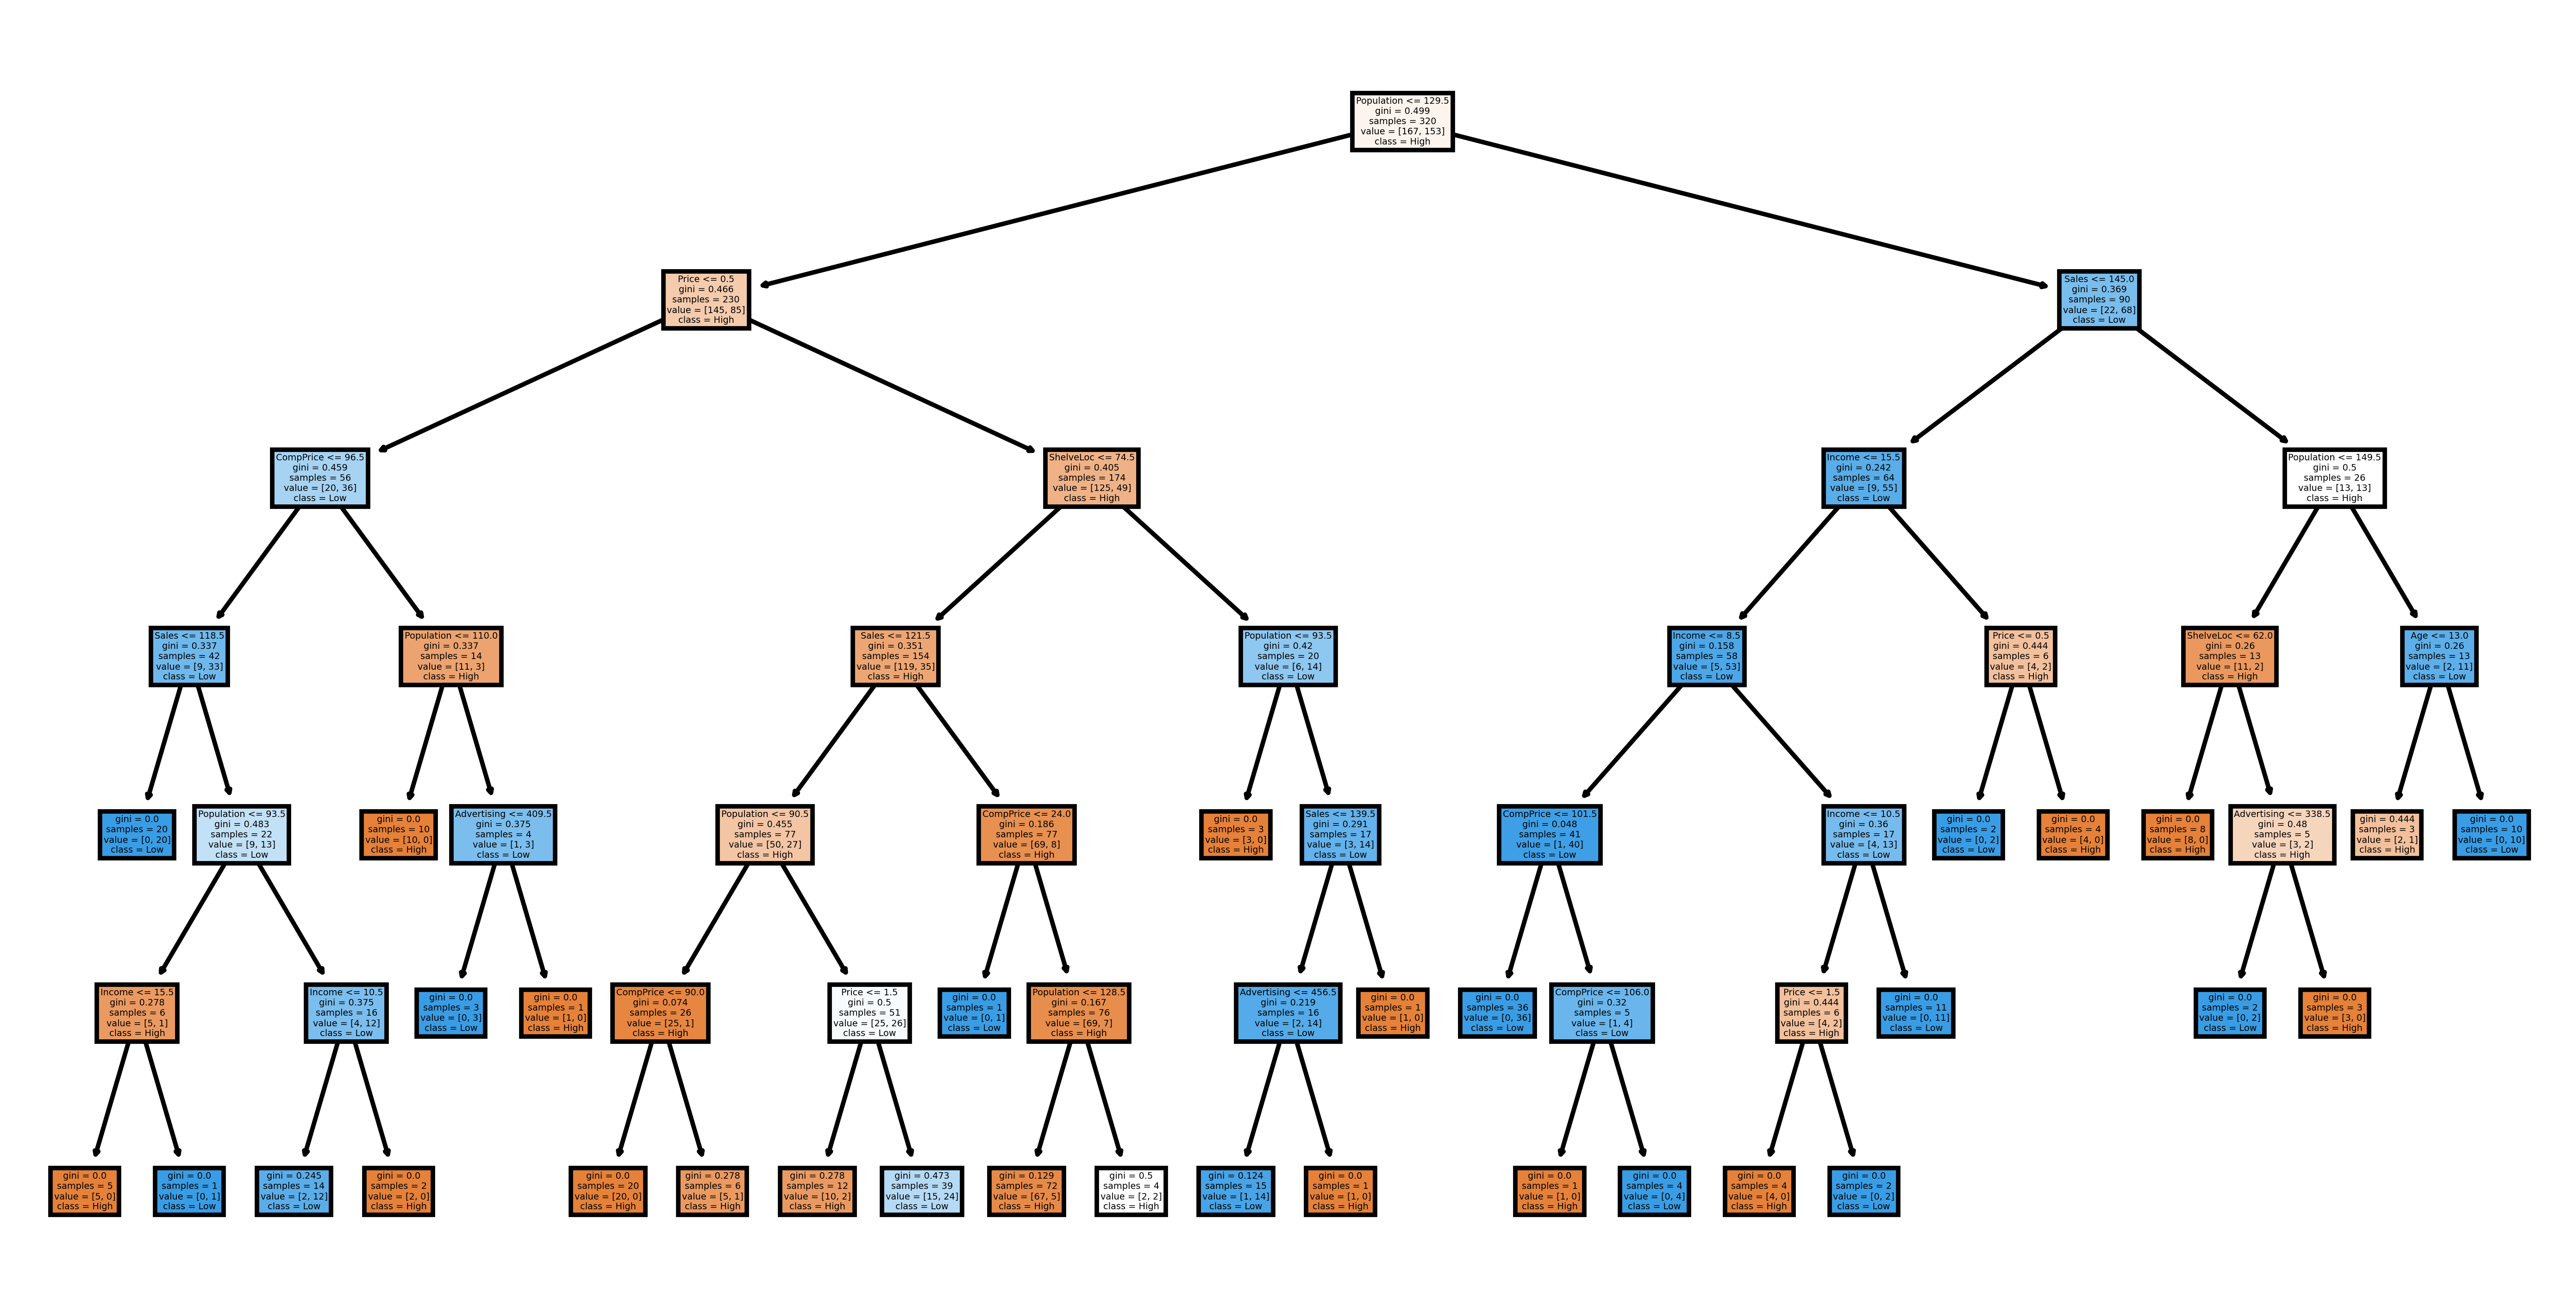

In [66]:
plt.subplots(figsize=(10,5),dpi=700)
tree.plot_tree(model2, feature_names = features , class_names= classnames , filled=True);

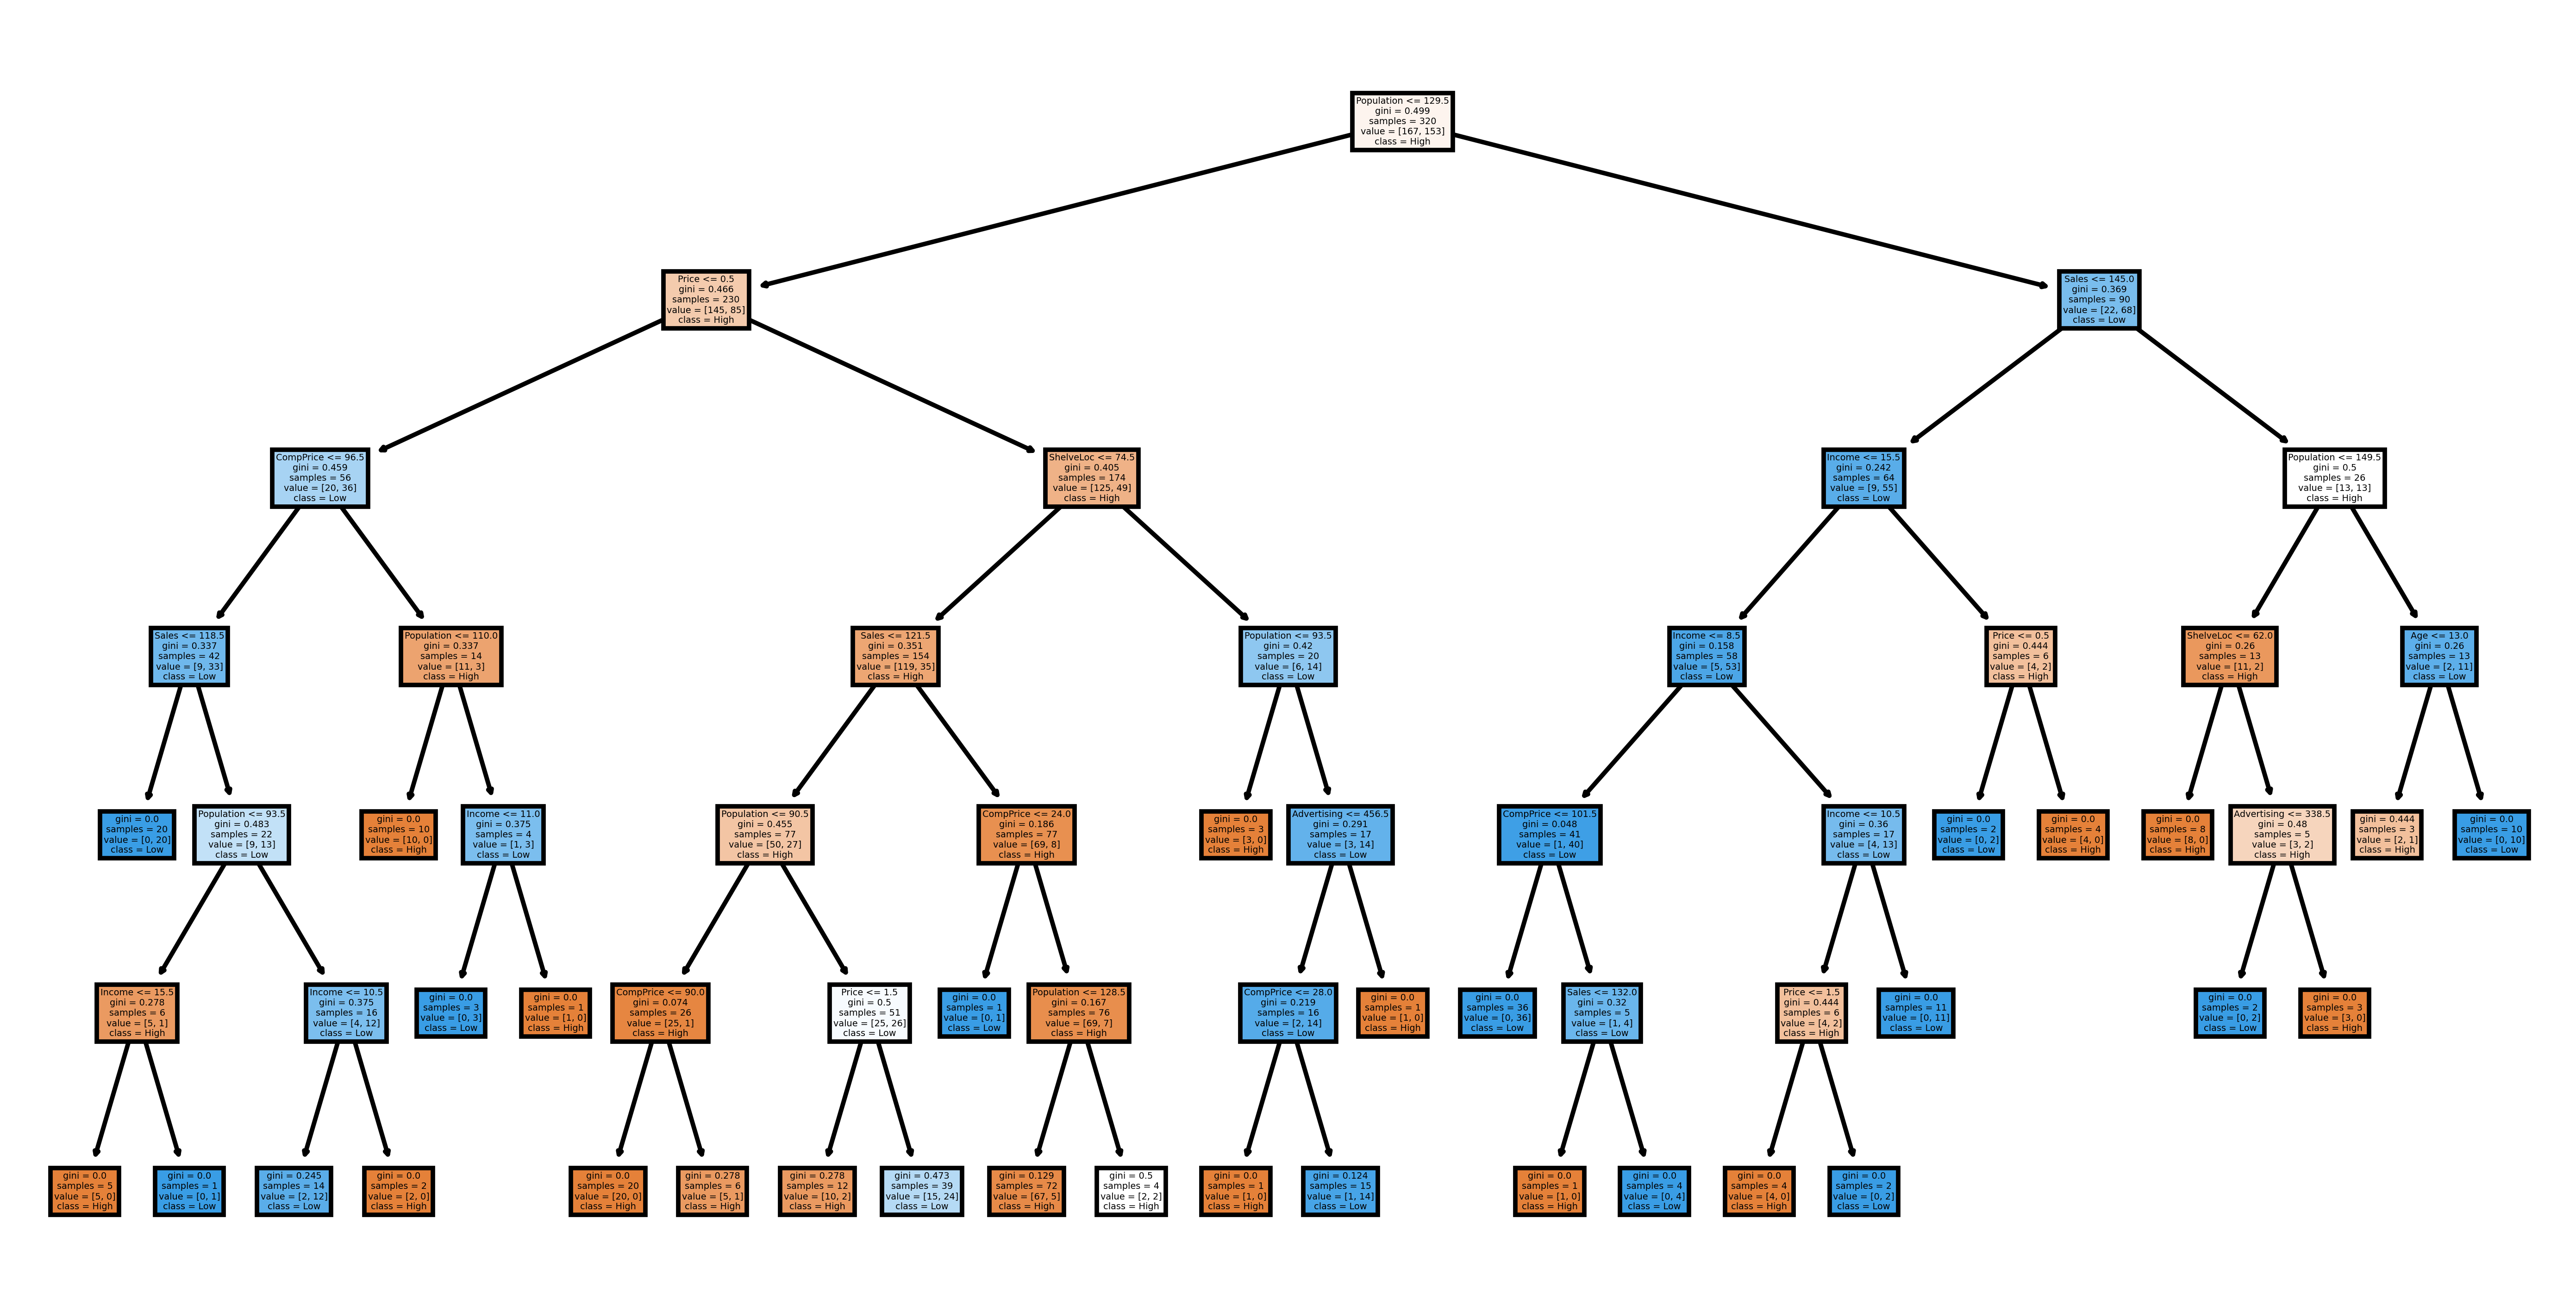

In [67]:
plt.subplots(figsize=(10,5),dpi=700)
tree.plot_tree(model1, feature_names = features , class_names= classnames , filled=True);